In [1]:
from os import path

import sys
sys.path.append(path.join("..", "notebooks"))
sys.path.append(path.join("..", "notebooks", "utils.py"))
import utils

import openTSNE

import anndata
import numpy as np
import pandas as pd
import scanpy as sc
import string
import gzip
import pickle
from sklearn import decomposition

import matplotlib.pyplot as plt
%matplotlib inline

# Pancreas

In [2]:
adata = anndata.read_h5ad(path.join("..", "data", "baron_2016h.h5ad"))
new = anndata.read_h5ad(path.join("..", "data", "xin_2016.h5ad"))

In [3]:
adata.obs["source"] = "Baron 2016"
adata

AnnData object with n_obs × n_vars = 8569 × 20125 
    obs: 'batch_id', 'labels', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [4]:
new.obs["source"] = "Xin 2016"
cell_mask = new.obs["labels"].isin(adata.obs["labels"])
new = new[cell_mask].copy()
new

AnnData object with n_obs × n_vars = 1492 × 39851 
    obs: 'batch_id', 'disease', 'age', 'sex', 'labels', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [5]:
full = adata.concatenate(new)
sc.pp.filter_genes(full, min_counts=1)
full

AnnData object with n_obs × n_vars = 10061 × 18136 
    obs: 'age', 'batch', 'batch_id', 'disease', 'labels', 'sex', 'source'
    var: 'n_counts'

In [6]:
%%time
adata_norm = full.copy()
sc.pp.normalize_per_cell(adata_norm, counts_per_cell_after=1_000_000)
sc.pp.log1p(adata_norm)

adata_norm.X = adata_norm.X.toarray()
adata_norm.X -= adata_norm.X.mean(axis=0)
adata_norm.X /= adata_norm.X.std(axis=0)

full.obsm["pca"] = decomposition.PCA(n_components=50).fit_transform(adata_norm.X)

CPU times: user 1min 15s, sys: 5.48 s, total: 1min 20s
Wall time: 4.18 s


In [7]:
%%time
affinities = openTSNE.affinity.Multiscale(
    full.obsm["pca"],
    perplexities=[50, 500],
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.pca(full.obsm["pca"], random_state=0)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

CPU times: user 34min 26s, sys: 6.43 s, total: 34min 33s
Wall time: 1min 43s


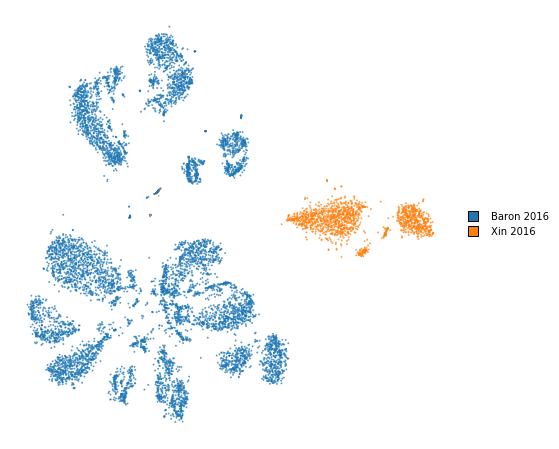

In [8]:
utils.plot(embedding, full.obs["source"])

In [9]:
with gzip.open("batch_effect_pancreas.pkl.gz", "wb") as f:
    pickle.dump(dict(embedding=embedding, source=full.obs["source"], labels=full.obs["labels"]), f)

# Brain

In [10]:
adata = anndata.read_h5ad(path.join("..", "data", "hrvatin_2018.h5ad"))
new = anndata.read_h5ad(path.join("..", "data", "chen_2017.h5ad"))

In [11]:
adata.obs["source"] = "Hrvatin 2018"
adata

AnnData object with n_obs × n_vars = 48266 × 25186 
    obs: 'labels', 'batch_id', 'paper_cell_type', 'paper_cell_subtype', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [12]:
new.obs["source"] = "Chen 2017"
cell_mask = new.obs["labels"].isin(adata.obs["labels"])
new = new[cell_mask].copy()
new

AnnData object with n_obs × n_vars = 9687 × 23284 
    obs: 'labels', 'paper_celltype', 'batch_id', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [13]:
full = adata.concatenate(new)
sc.pp.filter_genes(full, min_counts=1)
full

AnnData object with n_obs × n_vars = 57953 × 17312 
    obs: 'batch', 'batch_id', 'labels', 'paper_cell_subtype', 'paper_cell_type', 'paper_celltype', 'source'
    var: 'n_counts'

In [14]:
%%time
adata_norm = full.copy()
sc.pp.normalize_per_cell(adata_norm, counts_per_cell_after=1_000_000)
sc.pp.log1p(adata_norm)

adata_norm.X = adata_norm.X.toarray()
adata_norm.X -= adata_norm.X.mean(axis=0)
adata_norm.X /= adata_norm.X.std(axis=0)

full.obsm["pca"] = decomposition.PCA(n_components=50).fit_transform(adata_norm.X)

CPU times: user 3min 11s, sys: 21.1 s, total: 3min 32s
Wall time: 19.9 s


In [15]:
%%time
affinities = openTSNE.affinity.Multiscale(
    full.obsm["pca"],
    perplexities=[50, 500],
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.pca(full.obsm["pca"], random_state=0)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

CPU times: user 4h 54min 1s, sys: 30.6 s, total: 4h 54min 32s
Wall time: 16min 39s


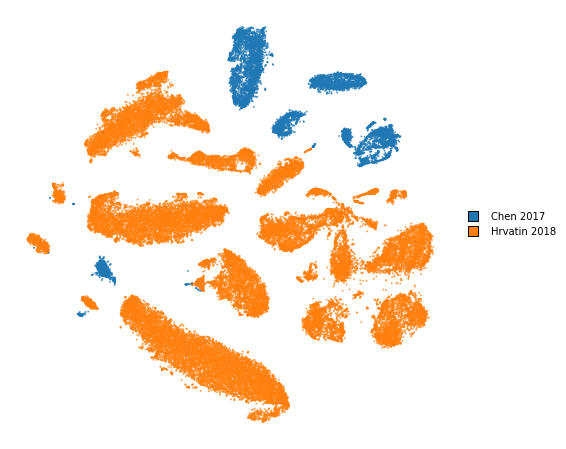

In [16]:
utils.plot(embedding, full.obs["source"])

In [17]:
with gzip.open("batch_effect_brain.pkl.gz", "wb") as f:
    pickle.dump(dict(embedding=embedding, source=full.obs["source"], labels=full.obs["labels"]), f)

# Retina

In [18]:
adata = anndata.read_h5ad(path.join("..", "data", "macosko_2015.h5ad"))
new = anndata.read_h5ad(path.join("..", "data", "shekhar_2016.h5ad"))

In [19]:
adata.obs["source"] = "Macosko 2015"
adata

AnnData object with n_obs × n_vars = 44808 × 24658 
    obs: 'batch_id', 'cluster_id', 'labels', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [20]:
new.obs["source"] = "Shekhar 2016"
cell_mask = new.obs["labels"].isin(adata.obs["labels"])
new = new[cell_mask].copy()
new

AnnData object with n_obs × n_vars = 26830 × 24903 
    obs: 'batch_id', 'cluster_id', 'labels', 'subclusters', 'source'
    uns: 'name', 'organism', 'tissue', 'year'

In [21]:
full = adata.concatenate(new)
sc.pp.filter_genes(full, min_counts=1)
full

AnnData object with n_obs × n_vars = 71638 × 20736 
    obs: 'batch', 'batch_id', 'cluster_id', 'labels', 'source', 'subclusters'
    var: 'n_counts'

In [22]:
%%time
adata_norm = full.copy()
sc.pp.normalize_per_cell(adata_norm, counts_per_cell_after=1_000_000)
sc.pp.log1p(adata_norm)

adata_norm.X = adata_norm.X.toarray()
adata_norm.X -= adata_norm.X.mean(axis=0)
adata_norm.X /= adata_norm.X.std(axis=0)

full.obsm["pca"] = decomposition.PCA(n_components=50).fit_transform(adata_norm.X)

CPU times: user 7min 20s, sys: 42.1 s, total: 8min 2s
Wall time: 1min 2s


In [23]:
%%time
affinities = openTSNE.affinity.Multiscale(
    full.obsm["pca"],
    perplexities=[50, 500],
    metric="cosine",
    n_jobs=8,
    random_state=0,
)
init = openTSNE.initialization.pca(full.obsm["pca"], random_state=0)
embedding = openTSNE.TSNEEmbedding(
    init,
    affinities,
    negative_gradient_method="fft",
    n_jobs=8,
)
embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5, inplace=True)
embedding.optimize(n_iter=750, exaggeration=1, momentum=0.8, inplace=True)

CPU times: user 3h 24min 51s, sys: 35.5 s, total: 3h 25min 26s
Wall time: 14min 37s


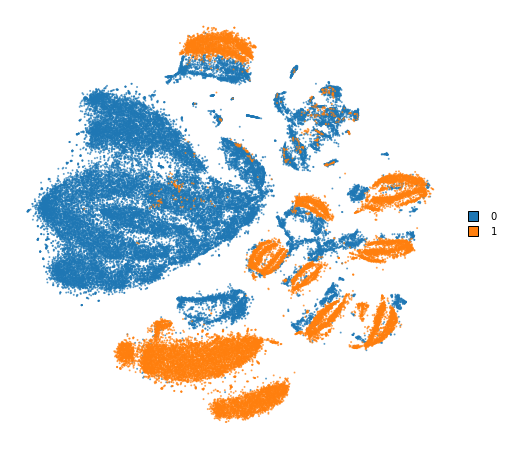

In [24]:
utils.plot(embedding, full.obs["batch"])

In [25]:
with gzip.open("batch_effect_retina.pkl.gz", "wb") as f:
    pickle.dump(dict(embedding=embedding, source=full.obs["source"], labels=full.obs["labels"]), f)